Latihan melakukan analisis sentimen dengan menggunakan data dari salah satu ulasan toko di tokopedia

# **Import Library**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [ ]:
dir = "/content/tokped_text.csv"

df = pd.read_csv(dir)

df.head()

,Unnamed: 0,Nama_Produk,Akun,Ulasan,rate,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed\t,Ulasan_Stemmed,Ulasan_clean
0,1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Stephanus,dua kali beli sayang lambat respon order pagi ...,3,"['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...","['yang', 'dua', 'kali', 'beli', 'sayang', 'lam...","['dua', 'kali', 'beli', 'sayang', 'lambat', 'r...","['dua', 'kali', 'beli', 'sayang', 'lambat', 'r...",dua kali beli sayang lambat respon order pagi ...
1,2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Yati,bagus kirim cepat,5,"['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']","['bagus', 'kirim', 'cepat']",bagus kirim cepat
2,3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Husin,barang sesuai pesan,5,"['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']","['barang', 'sesuai', 'pesan']",barang sesuai pesan
3,4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Febby,panas pakai,2,"['panas', 'pakai']","['panas', 'pakai']","['panas', 'pakai']","['panas', 'pakai']",panas pakai
4,5,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,Rahmat,barang sesuai minta bagus komunikasi jual beli...,3,"['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...","['barang', 'sesuai', 'minta', 'bagus', 'komuni...",NaN


# **Explore Data Analyst (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            503 non-null    int64 
 1   Nama_Produk           503 non-null    object
 2   Akun                  503 non-null    object
 3   Ulasan                503 non-null    object
 4   rate                  503 non-null    int64 
 5   Ulasan_tokenize       503 non-null    object
 6   Ulasan_normalized     503 non-null    object
 7   Ulasan_stop_removed	  501 non-null    object
 8   Ulasan_Stemmed        501 non-null    object
 9   Ulasan_clean          500 non-null    object
dtypes: int64(2), object(8)
memory usage: 39.4+ KB


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Nama_Produk,0
Akun,0
Ulasan,0
rate,0
Ulasan_tokenize,0
Ulasan_normalized,0
Ulasan_stop_removed\t,2
Ulasan_Stemmed,2
Ulasan_clean,3


In [ ]:
df.nunique()

,0
Unnamed: 0,503
Nama_Produk,61
Akun,412
Ulasan,466
rate,5
Ulasan_tokenize,468
Ulasan_normalized,467
Ulasan_stop_removed\t,468
Ulasan_Stemmed,468
Ulasan_clean,468


In [ ]:
df.drop(columns = ['Unnamed: 0', 'Akun', 'Ulasan_tokenize', 'Ulasan_normalized', 'Ulasan_stop_removed\t', 'Ulasan_Stemmed', 'Ulasan_clean'], inplace = True)

# **Plot Visualisasi untuk kolom rating menggunakan bar plot**

<Axes: xlabel='rate'>

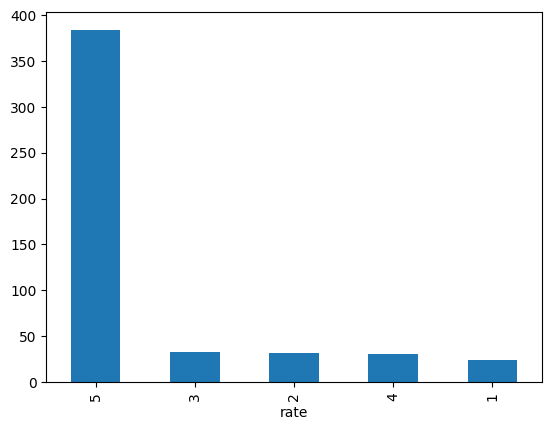

In [ ]:
df['rate'].value_counts().plot(kind = 'bar')

In [ ]:
df['Ulasan'].duplicated().sum()

np.int64(37)

In [ ]:
df_clean = df.drop_duplicates(subset = ['Ulasan'])

In [ ]:
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
df_clean['Ulasan'] = (
   df_clean['Ulasan']
    .str.lower()
    .str.replace('[^\w\s]', '')
    .str.strip()
)

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2652444213.py:4: SyntaxWarning: invalid escape sequence '\w'
  .str.replace('[^\w\s]', '')
/tmp/ipython-input-2652444213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ulasan'] = (


In [ ]:
df_clean.head()

,Nama_Produk,Ulasan,rate
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,dua kali beli sayang lambat respon order pagi ...,3
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,bagus kirim cepat,5
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,barang sesuai pesan,5
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,panas pakai,2
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,barang sesuai minta bagus komunikasi jual beli...,3


In [ ]:
def mapping(r):
  if r >= 4:
    return 'positif'
  elif r == 3:
    return 'netral'
  elif r <= 2:
    return 'negatif'

df_clean['sentimen'] = df_clean.pop('rate').apply(mapping)

/tmp/ipython-input-3100188201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentimen'] = df_clean.pop('rate').apply(mapping)


In [ ]:
df_clean.head()

,Nama_Produk,Ulasan,sentimen
0,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,dua kali beli sayang lambat respon order pagi ...,netral
1,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,bagus kirim cepat,positif
2,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,barang sesuai pesan,positif
3,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,panas pakai,negatif
4,Masker KF94 4 Ply Isi 10 Pcs Masker Medis Kese...,barang sesuai minta bagus komunikasi jual beli...,netral


In [ ]:
df_clean['sentimen'].value_counts()

,count
sentimen,
positif,381
negatif,55
netral,30


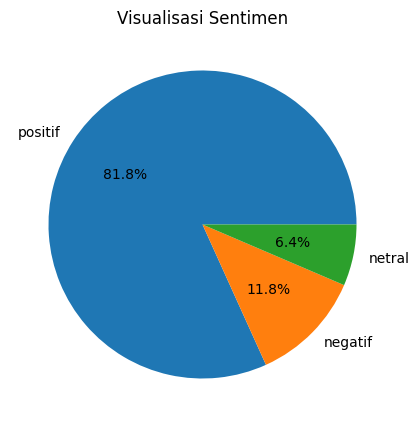

In [ ]:
plt.figure(figsize = (5, 5))
plt.title('Visualisasi Sentimen')
plt.pie(x = df_clean['sentimen'].value_counts(), labels = df_clean['sentimen'].value_counts().index, autopct = '%1.1f%%')
plt.show()

# **Split data untuk training dan testing**

In [ ]:
X = df_clean['Ulasan']
y = df_clean['sentimen']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 24
    )

In [ ]:
slang_dict = {
    'tdk': 'tidak',
    'tp': 'tapi',
    'bgs': 'bagus',
}

def normalize_slang_word(text):
  words = text.split()
  return " ".join([slang_dict[word] if word in slang_dict else word for word in words])

X_train = X_train.apply(normalize_slang_word)

# **Vektorisasi Data**

In [ ]:
# Vectorizer menggunakan TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase = True,
    min_df = 3,
    max_df = 0.8,
    stop_words = 'english',
    ngram_range = (1, 2),
    max_features = 1000
)

In [ ]:
X = vectorizer.fit_transform(X_train)

vectorizer.get_feature_names_out()

array(['ada', 'admin', 'agak', 'aja', 'aman', 'anak', 'bagus',
       'bagus sesuai', 'bahan', 'baik', 'banding', 'banget', 'barang',
       'barang bagus', 'barang cepat', 'barang kirim', 'barang nya',
       'barang ok', 'barang sesuai', 'barang terima', 'barang tidak',
       'barangnya', 'beda', 'belanja', 'beli', 'beli masker', 'biasa',
       'bonus', 'box', 'brg', 'bubble', 'bubble wrap', 'buka', 'bungkus',
       'cepat', 'cepat barang', 'cepat dan', 'cepat kirim',
       'cepat kualitas', 'cepat packing', 'cepat recommended',
       'cepat respon', 'cepat sampai', 'cocok', 'cuma', 'cuman', 'dan',
       'dan pengiriman', 'dan sesuai', 'datang', 'debu', 'deh', 'dengan',
       'deskripsi', 'deskripsi kirim', 'dg', 'dgn', 'di', 'dikirim',
       'dipakai', 'disini', 'diterima', 'dr', 'dus', 'enak', 'fast',
       'fast respon', 'foto', 'ga', 'gambar', 'gan', 'good', 'harga',
       'hari', 'harusnya', 'hitam', 'ini', 'ini pembelian', 'jadi', 'jd',
       'jg', 'jual', 'juga', 'k

In [ ]:
model = svm.SVC(decision_function_shape = 'ovo')
model.fit(X_train, y_train)



ValueError: could not convert string to float: 'layan bagusseller ramah cepat reply chatdan kirim cepat buka dusnyarecommemded'

In [ ]:
y_pred = model.predict(X_test, y_test)

TypeError: BaseSVC.predict() takes 2 positional arguments but 3 were given